# Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import selective_search as ss
from data import WasteSet, get_waste, standardize_inv
from model import get_resnet
from box_ops import nms
from utils import show_annotation, show_cmap

# Load ResNet

In [2]:
# model = get_resnet(18, 2)
# print(model)

# Selective Search

In [3]:
train_dataset, _, _, _, _, _ = get_waste(8,
                                         num_workers=0,
                                         data_augmentation=True,
                                         supercategories=True)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


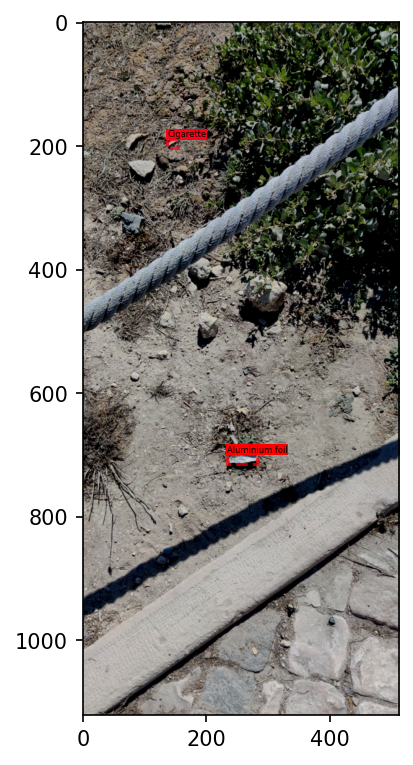

In [27]:
im, target = train_dataset[9]
im, _ = standardize_inv(im, None)
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
ax.imshow(np.moveaxis(im.numpy(), 0, 2))
show_annotation(target, ax, names=train_dataset.cat_names)

/zhome/28/4/143111/dlcv/lib/python3.9/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/zhome/28/4/143111/dlcv/lib/python3.9/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/zhome/28/4/143111/dlcv/lib/python3.9/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  w

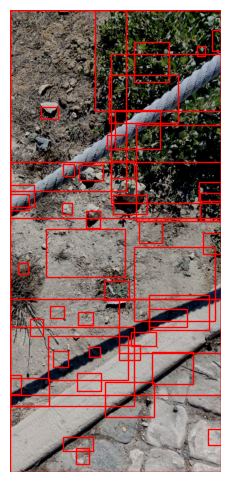

In [32]:
warnings.filterwarnings('ignore')
# Propose boxes
# boxes = ss.selective_search(
#     (np.moveaxis(im.numpy(), 0, 2) * 255).astype(np.uint8),
#     mode='single',
#     random_sort=True)


boxes = ss.selective_search((np.moveaxis(im.numpy(), 0, 2) * 255).astype(np.uint8), mode='fast')

# Filter box proposals
boxes_filter = ss.box_filter(boxes, min_size=20, topN=80)

boxes_filter, _ = nms(boxes_filter)

# draw rectangles on the original image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.moveaxis(im.numpy(), 0, 2))
for x1, y1, x2, y2 in boxes_filter:
    bbox = mpatches.Rectangle((x1, y1), (x2 - x1), (y2 - y1),
                              fill=False,
                              edgecolor='red',
                              linewidth=1)
    ax.add_patch(bbox)

plt.axis('off')
plt.show()